# Problem set 4: APIs, SQL, and supervised machine learning

**Total points (without extra credit)**: 48 


## Resources from class

### APIs
- [Lecture slides](https://docs.google.com/presentation/d/1eblPOhpOL1HDFk3XOh3KvcrFceJ4pwZNUU_fvU8i7uo/edit#slide=id.p)
- [Activity solutions](https://github.com/herbertfreeze/QSS_Public/blob/main/activities/solutions/06_apis_solutions.ipynb)


### Supervised ML
- [Lecture slides 1](https://docs.google.com/presentation/d/1V6X9aYkYLvyh3Ea0ZSn3qkttqKz7OOPkfvbqYybMi5Q/edit#slide=id.p)
- [Lecture slides 2](https://docs.google.com/presentation/d/13xJTI_GZ2HZYI9OSmezwLUXXFxIrjwHXKz50QUjBF0w/edit)
- [Intro activity solutions](https://github.com/herbertfreeze/QSS_Public/blob/main/activities/solutions/08_ML_intro_activity_solutions.ipynb)
- [Part II activity solutions](https://github.com/herbertfreeze/QSS_Public/blob/main/activities/solutions/08_ML_optimization_activity_solutions.ipynb)
- [DataCamp course](https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn)

### SQL
- [Lecture slides](https://docs.google.com/presentation/d/1HHgrkFtuhGIaPNMd1EOiM-8VtgnF0cwjMcmah8oWmWA/edit?usp=sharing)
- [Example code](https://github.com/herbertfreeze/QSS_Public/blob/main/activities/solutions/09_SQL_examplecode.ipynb)
- [Activity solutions](https://github.com/herbertfreeze/QSS_Public/blob/main/activities/solutions/09_SQL_activity_solutions.ipynb)
- [DataCamp course](https://app.datacamp.com/learn/courses/introduction-to-sql)

# Prep work: change SQL dataset

- Place it in [the same credentials yaml file on GitHub that contains the SQL database access information](https://github.com/herbertfreeze/QSS_public/blob/main/activities/09_db_cred.yaml) (password, host, etc.) 
    - Name the combined credentials file something appropriate (feel free to get creative)
    - Change the database name from `sentencing` to `math_gencompare`

## 0.0 Import packages

**Note you need to install some of the packages imported below (see the comments).**

In [172]:
## helpful packages
import pandas as pd
import numpy as np
import random
import re
import string
import requests
import plotnine 
from plotnine import *
import matplotlib.pyplot as plt
import yaml
#import warnings
#warnings.filterwarnings("ignore")

## note: you may need to install these using !pip install
#!pip install census
#!pip install us
import census
from census import Census
import us
from us import states
import mysql.connector

## sklearn imports
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## print mult things
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


def load_creds(path: str):
    with open(path, 'r') as stream:
        try:
            creds = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    return(creds)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)



# 1. Write a wrapper function to pull data from the NAEP API (12 points)

In the class activity on APIs (see link above), we practiced pulling from the API for the National Assessment of Educational Progress (NAEP), "America's report card" of test scores. We pulled a small amount of data at the national level (writing scores by gender) using a query where the parameters were hardcoded.
    
In this problem, we'll practice pulling a larger set of data and writing a wrapper function.
    
As a reminder, the documentation is here: https://www.nationsreportcard.gov/api_documentation.aspx

The base link is: https://www.nationsreportcard.gov/Dataservice/GetAdhocData.aspx

## 1.1 Write a query to pull 8th-grade mathematics scores in 2015 from the state of California (CA) by gender (1 point)

- Subject: mathematics 
- Subscale: MRPCM composite scale 
- Grade: 8
- Year: 2015
- grouping variable: GENDER 
- Jurisdiction: CA 
- stattype = MN (for mean)

Print the output in dataframe format and briefly interpret; what do scores look like between the genders?

In [3]:
naep_query = (
'https://www.nationsreportcard.gov/'
'Dataservice/GetAdhocData.aspx?'
'type=data&subject=mathematics&grade=8&'
'subscale=MRPCM&variable=GENDER&jurisdiction=CA&stattype=MN:MN&Year=2015')

In [7]:
# your code here
naep_resp = requests.get(naep_query)
naep_resp
print(type(naep_resp))

# json
naep_resp_j = naep_resp.json()
naep_resp_j

# dataframe
naep_resp_d = pd.DataFrame(naep_resp_j['result'])
naep_resp_d

<Response [200]>

<class 'requests.models.Response'>


{'status': 200,
 'result': [{'year': 2015,
   'sample': 'R3',
   'yearSampleLabel': '2015',
   'Cohort': 2,
   'CohortLabel': 'Grade 8',
   'stattype': 'MN:MN',
   'subject': 'MAT',
   'grade': 8,
   'scale': 'MRPCM',
   'jurisdiction': 'CA',
   'jurisLabel': 'California',
   'variable': 'GENDER',
   'variableLabel': 'Gender',
   'varValue': '1',
   'varValueLabel': 'Male',
   'value': 275.020976636682,
   'isStatDisplayable': 1,
   'errorFlag': 0},
  {'year': 2015,
   'sample': 'R3',
   'yearSampleLabel': '2015',
   'Cohort': 2,
   'CohortLabel': 'Grade 8',
   'stattype': 'MN:MN',
   'subject': 'MAT',
   'grade': 8,
   'scale': 'MRPCM',
   'jurisdiction': 'CA',
   'jurisLabel': 'California',
   'variable': 'GENDER',
   'variableLabel': 'Gender',
   'varValue': '2',
   'varValueLabel': 'Female',
   'value': 275.638637274477,
   'isStatDisplayable': 1,
   'errorFlag': 0}]}

,year,sample,yearSampleLabel,Cohort,CohortLabel,stattype,subject,grade,scale,jurisdiction,jurisLabel,variable,variableLabel,varValue,varValueLabel,value,isStatDisplayable,errorFlag
0,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,275.020977,1,0
1,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,275.638637,1,0


## 1.2 Write a query to pull 8th-grade mathematics scores in 2013, 2015, 2017, and 2019 from California by gender (1 point)

Same as 1.1 but pull the years 2013, 2015, 2017, and 2019 (search documentation for how to combine) in one query

In [38]:
# WRITING QUERY
query = 'https://www.nationsreportcard.gov/Dataservice/GetAdhocData.aspx?' \
              'type=data&subject=mathematics&grade=8&subscale=MRPCM&variable=GENDER' \
              '&stattype=MN:MN&jurisdiction=CA&Year=2013,2015,2017,2019'


In [19]:
# I realize now after doing the later problems that this was a way harder way of writing the query 
# So you can disregard this function. Will use for the line plot below.
def naep_api_calls(years: list,
                   baseurl = 'https://www.nationsreportcard.gov/'
                             'Dataservice/GetAdhocData.aspx?'
                             'type=data&subject=mathematics&grade=8&'
                             'subscale=MRPCM&variable=GENDER&jurisdiction=CA&stattype=MN:MN'):
                       

    
    dflist = []
    
    for year in years:
        naep_queryX = baseurl + ('&Year=' + str(year))
        naep_respX = requests.get(naep_queryX)
        
        #if "System.Exception" in naep_resp.text:
        #    print(f"NAEP results not found for grade {str(grade)}, please try with grade in range of 1-12")
        #else:
        try:
            naep_resp_df = pd.DataFrame(naep_respX.json()['result'])
            dflist.append(naep_resp_df)
        except Exception as e:
            print("Failed to get result from API for grade {} due to error:".format(str(year)))
            print(e)
        
    combined_result_df = pd.concat(dflist)
    
    return(combined_result_df)


q1_2df = naep_api_calls(years = [2013,2015,2017, 2019])
q1_2df


,year,sample,yearSampleLabel,Cohort,CohortLabel,stattype,subject,grade,scale,jurisdiction,jurisLabel,variable,variableLabel,varValue,varValueLabel,value,isStatDisplayable,errorFlag
0,2013,R3,2013,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,277.167171,1,0
1,2013,R3,2013,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,274.597824,1,0
0,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,275.020977,1,0
1,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,275.638637,1,0
0,2017,R3,2017,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,276.608704,1,0
1,2017,R3,2017,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,276.669430,1,0
0,2019,R3,2019,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,274.511628,1,0
1,2019,R3,2019,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,276.721824,1,0


## 1.3 Create a line plot to show variation in the scores across years (2 points)

Using the results from 1.2, create a plot where the x axis has the year and the y axis is the math scores (`value` in dataframe), and there are separate lines/colors for male versus female students (`varValueLabel` in dataframe)

Start the limits of the y axis minimum at 272 and add informative labels. Be sure your x-axis is ticked on odd years, because NAEP scores skip even years. 

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Test Score Values Over the Years for Male and Female')

(272.0, 277.29994776969266)

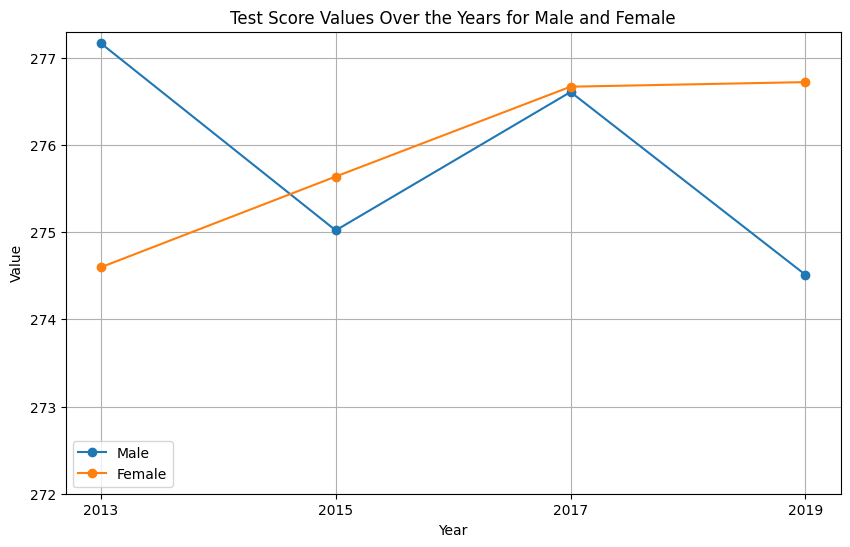

In [31]:
# split data into male and female
male_data = q1_2df[q1_2df['varValueLabel'] == 'Male']
female_data = q1_2df[q1_2df['varValueLabel'] == 'Female']



plt.figure(figsize=(10, 6))
plt.plot(male_data['yearSampleLabel'], male_data['value'], label='Male', marker='o')
plt.plot(female_data['yearSampleLabel'], female_data['value'], label='Female', marker='o')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Test Score Values Over the Years for Male and Female')
plt.legend()
plt.ylim(272)  # Set the Y-axis minimum to 272

plt.grid(True)
plt.show()

## 1.4 Reproduce the queries from 1.1 and 1.2 using a user-defined function (4 points)

Create a function, `construct_naep_query` that takes in two arguments:

- year: this should be a list with all years (so if one year, single element list; if multiple years, list with those years)
- place: this should be a string with the name of the state or jurisdiction to pull 
    
Have the function return the query and make sure it's identical to the queries you wrote for 1.1 and 1.2 (can use assert or other checker)

In [ ]:
# your code here to define function


In [29]:
# your code here to execute function
def naep_api_calls(years, jurisdiction,
                   baseurl = 'https://www.nationsreportcard.gov/'
                             'Dataservice/GetAdhocData.aspx?'
                             'type=data&subject=mathematics&grade=8&'
                             'subscale=MRPCM&variable=GENDER', 
               query_part2 = '&stattype=MN:MN'):
    
    if isinstance(years, int):
        years = [years]  # Convert a single year to a list (In the case that it is only one number)
    dflist = []
    
    for year in years:
        naep_queryX = baseurl + ('&jurisdiction=' + str(jurisdiction)) + query_part2+ ('&Year=' + str(year))
        naep_respX = requests.get(naep_queryX)
        
        #if "System.Exception" in naep_resp.text:
        #    print(f"NAEP results not found for grade {str(grade)}, please try with grade in range of 1-12")
        #else:
        try:
            naep_resp_df = pd.DataFrame(naep_respX.json()['result'])
            dflist.append(naep_resp_df)
        except Exception as e:
            print("Failed to get result from API for grade {} due to error:".format(str(year)))
            print(e)
        
    combined_result_df = pd.concat(dflist)
    
    return(combined_result_df)


q1_4df = naep_api_calls(years = [2013, 2015, 2017, 2019], jurisdiction = "CA")
q1_4df

,year,sample,yearSampleLabel,Cohort,CohortLabel,stattype,subject,grade,scale,jurisdiction,jurisLabel,variable,variableLabel,varValue,varValueLabel,value,isStatDisplayable,errorFlag
0,2013,R3,2013,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,277.167171,1,0
1,2013,R3,2013,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,274.597824,1,0
0,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,275.020977,1,0
1,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,275.638637,1,0
0,2017,R3,2017,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,276.608704,1,0
1,2017,R3,2017,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,276.669430,1,0
0,2019,R3,2019,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,274.511628,1,0
1,2019,R3,2019,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,276.721824,1,0


## 1.5 Write and execute user-defined function that takes in a query and returns a pandas dataframe with the content of the response (4 points)

- Write a user-defined function (`process_naep_query`) that takes in the CA-specific NAEP query as a string, calls the API, and transforms the response into a pandas dataframe. Have the function return that pandas dataframe

- Make sure the function is flexible enough to handle queries that return an error; for queries that return an error, have the function return the string "Data not found; check your query" (see [API part 1 solutions code](https://github.com/herbertfreeze/QSS_public/blob/main/activities/solutions/06_apis_solutions.ipynb) for an example of `try:`/`except:`)

- Execute the function on the query that pulls 2013-2019 data (either from handwriting the query or the result in 1.4)

- Print the resulting dataframe

- Then execute the function on a query that pulls a state that doesn't exist (call this state ZZ)

In [37]:
# your code here
# your code here to execute function
def process_naep_query(query):
    try:
        naep_resp = requests.get(query)
        naep_resp.raise_for_status()  # Check for HTTP errors
        
        naep_resp_df = pd.DataFrame(naep_resp.json()['result'])
        return naep_resp_df
    except requests.exceptions.RequestException as e:
        return "Data not found; check your query"
    
# Example usage with a valid query
valid_query = 'https://www.nationsreportcard.gov/Dataservice/GetAdhocData.aspx?' \
              'type=data&subject=mathematics&grade=8&subscale=MRPCM&variable=GENDER' \
              '&stattype=MN:MN&jurisdiction=CA&Year=2013,2015,2017,2019'
valid = process_naep_query(valid_query)

invalid_query = 'https://www.nationsreportcard.gov/Dataservice/GetAdhocData.aspx?' \
              'type=data&subject=mathematics&grade=8&subscale=MRPCM&variable=GENDER' \
              '&stattype=MN:MN&jurisdiction=ZZ&Year=2013,2015,2017,2019'
invalid = process_naep_query(invalid_query)

# Print working query
valid
# Print invalid query and resulting response
invalid

,year,sample,yearSampleLabel,Cohort,CohortLabel,stattype,subject,grade,scale,jurisdiction,jurisLabel,variable,variableLabel,varValue,varValueLabel,value,isStatDisplayable,errorFlag
0,2013,R3,2013,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,277.167171,1,0
1,2013,R3,2013,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,274.597824,1,0
2,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,275.020977,1,0
3,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,275.638637,1,0
4,2017,R3,2017,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,276.608704,1,0
5,2017,R3,2017,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,276.669430,1,0
6,2019,R3,2019,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,274.511628,1,0
7,2019,R3,2019,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,276.721824,1,0


'Data not found; check your query'

# 2. Explore data using SQL queries (18 points)

In the previous example, you worked with the data in a flat file and manipulated it using pandas. Here, we're going to practice running queries to do some calculations using SQL --- in the case of our data, this is a bit overkill since the data are small but it is practice for larger datasets.

## 2.1 Load database credentials and establish a connection (1 point)

Load a credentials file that contains the credentials you'll need for this and the next problem:

- The credentials for our class database
- The credentials for the Census API (see instructions above)

Note: to establish the SQL connection, you need to be on `eduroam` (near campus) or the Dartmouth's GlobalProtect `VPN`  ([installation instructions here](https://services.dartmouth.edu/TDClient/1806/Portal/KB/ArticleDet?ID=72395))

In [87]:
creds = load_creds("math_gencompare.yaml")

In [88]:
## connect to the database
cnx = mysql.connector.connect(
    user=creds['practice_database']['user'], 
    password=creds['practice_database']['password'],
    port=creds['practice_database']['port'],
    database= creds['practice_database']['database'],
    host = creds['practice_database']['host'])
cursor = cnx.cursor(buffered=True)
cnx

## 2.2 Run a query to select all columns and the first 5 rows of the math_gencompare database to explore structure (2 points)

Read the results in as a pandas dataframe and print the result

In [89]:
# your code here
q = """ 
select 
    * 
from math_gencompare 
limit 5
"""
print(pd.read_sql_query(q, cnx))

  abbrev  FIPS       state  year            female              male
0     AK     2      Alaska  2013  281.388243030547  281.723376175464
1     AL     1     Alabama  2013  268.920111754346  269.457455785562
2     AR     5    Arkansas  2013  278.381788404903  277.457662328569
3     AZ     4     Arizona  2013  279.249581150207  280.174388600923
4     CA     6  California  2013  274.597823860242  277.167170641967


/var/folders/yq/ssgkp1wn2tbb4cflr_7nnmtr0000gn/T/ipykernel_48566/4028515833.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


## 2.3 Find the (1) number of rows in the database, (2) number of distinct states,  (3) number of distinct years (3 points)

Interpret the results - how do you think the data is structured in terms of states and years (eg long format where each state repeated; wide format)?

**Hint**: rather than using count `(*)` for the latter two, think about the `distinct` command in combination with `count`: https://www.w3resource.com/mysql/aggregate-functions-and-grouping/aggregate-functions-and-grouping-count-with-distinct.php

In [90]:
# your code here
q2 = """ 
select 
    * 
from math_gencompare 
"""
df2_3 = pd.read_sql_query(q2, cnx)
df2_3

/var/folders/yq/ssgkp1wn2tbb4cflr_7nnmtr0000gn/T/ipykernel_48566/1025872020.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,abbrev,FIPS,state,year,female,male
0,AK,2,Alaska,2013,281.388243030547,281.723376175464
1,AL,1,Alabama,2013,268.920111754346,269.457455785562
2,AR,5,Arkansas,2013,278.381788404903,277.457662328569
3,AZ,4,Arizona,2013,279.249581150207,280.174388600923
4,CA,6,California,2013,274.597823860242,277.167170641967
5,CO,8,Colorado,2013,289.923674635524,289.454320290854
6,CT,9,Connecticut,2013,285.001718764803,285.474592022455
7,DE,10,Delaware,2013,280.819271814912,283.83045499023
8,FL,12,Florida,2013,280.041721351947,281.654865567404
9,GA,13,Georgia,2013,278.897696968548,279.446738578749


In [91]:
# Print lenght in rows 
print(f"Number of rows = {len(df2_3)}")

# Distinct states
q3 = """
select count(distinct abbrev)
from math_gencompare
"""

# distinct states printed 
distinctAbbrev = pd.read_sql_query(q3, cnx)
distinctAbbrev

# distinct years 
q4 = """
select count(distinct year)
from math_gencompare
"""

# Distinct years
distinctYear = pd.read_sql_query(q4, cnx)
distinctYear

Number of rows = 200


/var/folders/yq/ssgkp1wn2tbb4cflr_7nnmtr0000gn/T/ipykernel_48566/3015350597.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,count(distinct abbrev)
0,50


/var/folders/yq/ssgkp1wn2tbb4cflr_7nnmtr0000gn/T/ipykernel_48566/3015350597.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,count(distinct year)
0,4


The data shows that there are 200 rows. The 200 rows are made up of the 50 states being listed 4 times each. Each state is listed in 2013, 2015, 2017, and 2019. This is considered a long format because the states are being repeated four times for each one of the years.

## 2.4 Construct a new variable, `is_male_higher` that takes the value of 1 if the math scores of males exceed that of females in that state and year (each row) (2 points)

Read in the results, print the head, and find the mean across all rows (the percentage of state-years where male students have higher scores)

In [93]:
# your code here
## create new col "call it is_male_higher" because already have is_male_higher 
q5 = """
SELECT *,
       CASE
         WHEN male > female THEN 1
         ELSE 0
       END AS is_male_higher
FROM   math_gencompare 
"""
pd.read_sql_query(q5, cnx)

/var/folders/yq/ssgkp1wn2tbb4cflr_7nnmtr0000gn/T/ipykernel_48566/564145736.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,abbrev,FIPS,state,year,female,male,is_male_higher
0,AK,2,Alaska,2013,281.388243030547,281.723376175464,1
1,AL,1,Alabama,2013,268.920111754346,269.457455785562,1
2,AR,5,Arkansas,2013,278.381788404903,277.457662328569,0
3,AZ,4,Arizona,2013,279.249581150207,280.174388600923,1
4,CA,6,California,2013,274.597823860242,277.167170641967,1
5,CO,8,Colorado,2013,289.923674635524,289.454320290854,0
6,CT,9,Connecticut,2013,285.001718764803,285.474592022455,1
7,DE,10,Delaware,2013,280.819271814912,283.83045499023,1
8,FL,12,Florida,2013,280.041721351947,281.654865567404,1
9,GA,13,Georgia,2013,278.897696968548,279.446738578749,1


## 2.5 group by year and find the percentage of states where male scores are higher than females (4 points)

**A.** Write a query that (1) groups by year and (2) finds the percentage of states that have higher scores for males than females in this year 

**B.** Print the resulting dataframe and interpret the results 

**Hint:** To compare male and female scores, consider logical operators (e.g., `<`, `>`, `=`) and simple aggregation (e.g., `avg()` to get mean) or using a subquery to construct the indicator.

In [98]:
# your code here
q6 = """
SELECT year,
       (SUM(is_male_higher = 1) / COUNT(*)) * 100 AS percentage_is_male_higher
FROM (
  SELECT year,
         CASE
           WHEN male > female THEN 1
           ELSE 0
         END AS is_male_higher
  FROM math_gencompare
) AS subquery
GROUP BY year
ORDER BY year;
"""
print(pd.read_sql_query(q6, cnx))


   year  percentage_is_male_higher
0  2013                       62.0
1  2015                       56.0
2  2017                       58.0
3  2019                       30.0


/var/folders/yq/ssgkp1wn2tbb4cflr_7nnmtr0000gn/T/ipykernel_48566/3920488141.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


It appears as if from 2013 to 2019 the percentage of states where males tested higher in math decreased. The main discrepancy comes from 2017 to 2019 where the percentage dropped from 58 to 30.

## 2.6 group by state and find the percentage of years where male scores higher than females

**A.** Write a query that (1) groups by state and (2) finds the percentage of years that have higher scores for males than females in that state

**B.** Plot the results ordering the states from males higher all 4 years to males higher none of the years

In [111]:
# your code here
q7 = """
SELECT state AS State,
       SUM(CASE WHEN is_male_higher = 1 THEN 1 ELSE 0 END) / COUNT(*) * 100 AS percentage_males_higher
FROM (
  SELECT state,
         year,
         CASE WHEN male > female THEN 1 ELSE 0 END AS is_male_higher
  FROM math_gencompare
) AS subquery
GROUP BY state
ORDER BY percentage_males_higher DESC;
"""
q2_6 = pd.read_sql_query(q7, cnx)

q2_6

/var/folders/yq/ssgkp1wn2tbb4cflr_7nnmtr0000gn/T/ipykernel_48566/3683547980.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,State,percentage_males_higher
0,Utah,100.0
1,Illinois,100.0
2,Idaho,100.0
3,Alaska,75.0
4,New Hampshire,75.0
5,New Jersey,75.0
6,New Mexico,75.0
7,Nevada,75.0
8,Maine,75.0
9,Kansas,75.0


<Figure size 1200x800 with 0 Axes>

<BarContainer object of 50 artists>

Text(0.5, 0, 'Percentage of Years with Males Higher')

Text(0, 0.5, 'State')

Text(0.5, 1.0, 'Percentage of Years with Males Higher Than Females by State')

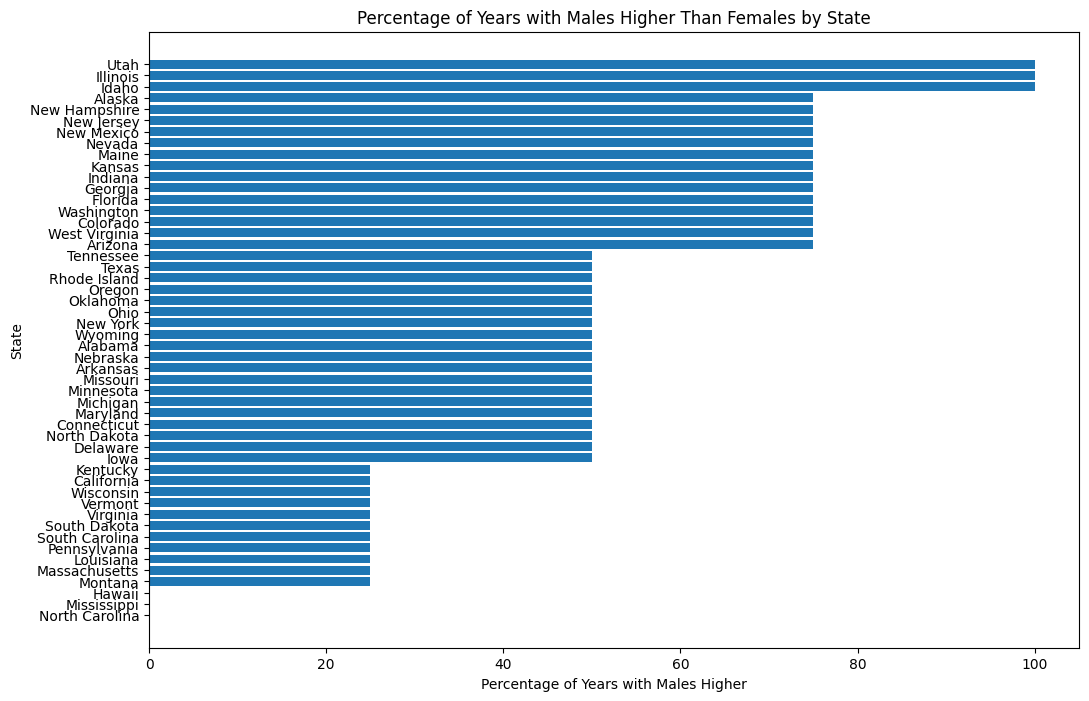

In [116]:
# Plot
plt.figure(figsize=(12, 8))
plt.barh(q2_6['State'], q2_6['percentage_males_higher'])
plt.xlabel('Percentage of Years with Males Higher')
plt.ylabel('State')
plt.title('Percentage of Years with Males Higher Than Females by State')
plt.gca().invert_yaxis()  # To order states with males higher all 4 years at the top
plt.show()

## 2.7 Use a subquery to create an indicator and group by that indicator (6 points)

The following states were the first 6 to expand the right to vote to women before the uniform federal expansion in 1920

- Wyoming 1890
- Colorado 1893
- Utah 1896
- Idaho 1896
- Washington 1910
- California 1911

**A.** Create an indicator `is_early_voter` for whether a state is in that list or not; do so without typing the state names inside the string and instead collapsing the list of states we provide and using something like `format`. Hint on how to combine the state names while preserving the quotes around each: https://stackoverflow.com/questions/12007686/join-a-list-of-strings-in-python-and-wrap-each-string-in-quotation-marks 

**B.** Then, group by the `is_early_voter` indicator and `year` and find the percencentage of states in each group where males had higher scores than females 

**C.** Print the resulting dataframe and interpret. Does early expansion of voting seem to be correlated with girls scoring better on the math tests a century later?

**Hint:** in order to group by the indicator in step b, you may need to use a subquery 

In [121]:
## list of states we provide
list_suffrage = ["Wyoming", "Colorado", "Utah", "Idaho", "Washington", 
                "California"]
formatted_states = ', '.join(f'"{w}"' for w in list_suffrage)

In [132]:
## your code here

q8 = f"""
WITH early_voter_indicator AS (
  SELECT *,
         CASE WHEN state IN ({formatted_states}) THEN "Yes" ELSE "No" END AS is_early_voter
  FROM math_gencompare
)

-- Calculate the percentage of states where males had higher scores than females
SELECT is_early_voter,
       year,
       (SUM(CASE WHEN male > female THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS percentage_males_higher
FROM early_voter_indicator
GROUP BY is_early_voter, year;
"""
pd.read_sql_query(q8, cnx)


/var/folders/yq/ssgkp1wn2tbb4cflr_7nnmtr0000gn/T/ipykernel_48566/798941558.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,is_early_voter,year,percentage_males_higher
0,No,2013,59.0909
1,Yes,2013,83.3333
2,No,2015,54.5455
3,Yes,2015,66.6667
4,No,2017,54.5455
5,Yes,2017,83.3333
6,No,2019,27.2727
7,Yes,2019,50.0000


The results make it look like in the states where they were not early voters the percentage of males scoring higher has decreased through the years. In the states where there were early voters for women, the percentage of males that score higher go up and down but have gone down from 2013 to 2019 overall. It looks like since we are only looking at recent data the early voters for women states may not still have much of imapct.

# 3. Explore variation in math score disparities and trends (18 points)

## 3.0 Read in the `acs_wmath.pkl` file (csv is backup) (0 points)

In [136]:
## your code here
q3 = pd.read_csv('acs_wmath.csv')
q3.head()

,math_female_2013,math_female_2015,math_female_2017,math_female_2019,math_male_2013,math_male_2015,math_male_2017,math_male_2019,abbrev,FIPS,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 10 to less than 25 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 100 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 25 to less than 50 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 50 to less than 100 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated dollar value of zero allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated more than 0 to less than 10 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated no income allocated,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal10th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal11th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal12th grade no diploma,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal1st grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal2nd grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal3rd grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal4th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal5th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal6th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal7th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal8th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal9th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalassociate's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalbachelor's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotaldoctorate degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalged or alternative credential,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalkindergarten,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalmaster's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalno schooling completed,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalnursery school,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalprofessional school degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalregular high school diploma,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college 1 or more years no degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college less than 1 year,acspredict_household_type__including_living_alone__by_relationshipestimatetotalin group quarters,acspredict_household_type__including_living_alone__by_relationshipestimatetot

## 3.1 Create a visualization where one axis is the state; the other axis is the male 2013 math scores - the female 2013 math scores (gender disparity) (2 points)


You have free rein over additional details but make sure it is informative over what direction of disparity positive versus negative values mean


<Figure size 1000x800 with 0 Axes>

<BarContainer object of 50 artists>

Text(0.5, 0, 'States')

Text(0, 0.5, 'Male Scores - Female Scores')

Text(0.5, 1.0, 'Disparity between Male and Female Math Scores (2013)')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'Maine'),
  Text(1, 0, 'Delaware'),
  Text(2, 0, 'Wyoming'),
  Text(3, 0, 'California'),
  Text(4, 0, 'Oregon'),
  Text(5, 0, 'South Carolina'),
  Text(6, 0, 'Nevada'),
  Text(7, 0, 'Minnesota'),
  Text(8, 0, 'Florida'),
  Text(9, 0, 'Kansas'),
  Text(10, 0, 'Pennsylvania'),
  Text(11, 0, 'Iowa'),
  Text(12, 0, 'Idaho'),
  Text(13, 0, 'Utah'),
  Text(14, 0, 'Washington'),
  Text(15, 0, 'South Dakota'),
  Text(16, 0, 'Ohio'),
  Text(17, 0, 'Arizona'),
  Text(18, 0, 'Indiana'),
  Text(19, 0, 'Texas'),
  Text(20, 0, 'Kentucky'),
  Text(21, 0, 'Massachusetts'),
  Text(22, 0, 'North Dakota'),
  Text(23, 0, 'Georgia'),
  Text(24, 0, 'Alabama'),
  Text(25, 0, 'Connecticut'),
  Text(26, 0, 'Rhod

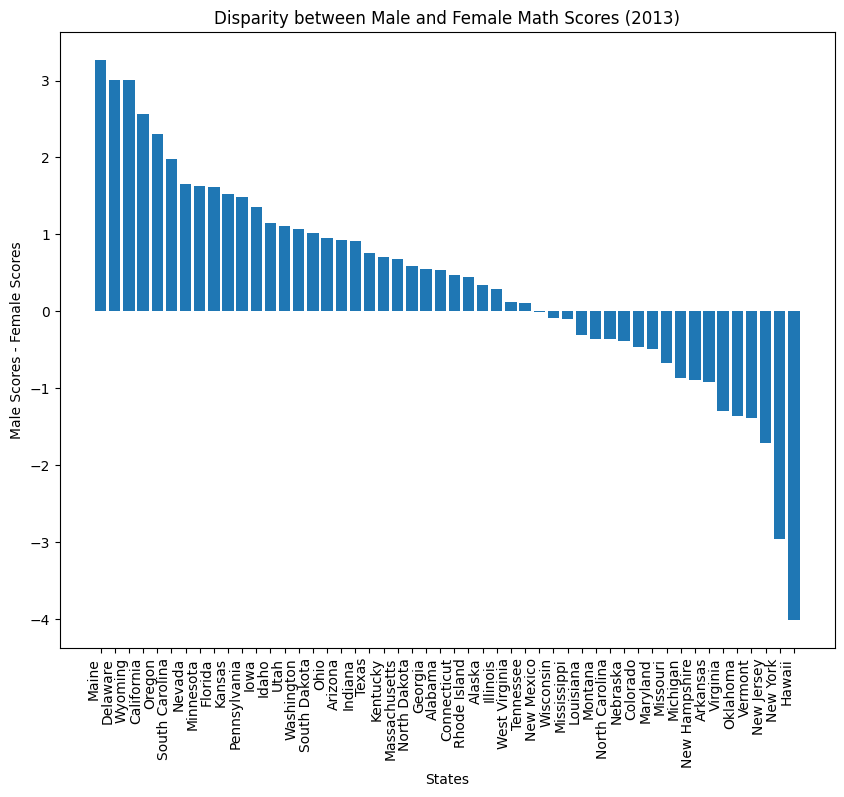

In [147]:
## your code here
q3['math_disparity_2013'] = q3['math_male_2013'] - q3['math_female_2013']

q3_sorted = q3.sort_values(by='math_disparity_2013', ascending=False)

# Plot the bar chart with the sorted DataFrame
plt.figure(figsize=(10, 8))
plt.bar(q3_sorted['state'], q3_sorted['math_disparity_2013'])
plt.xlabel('States')
plt.ylabel('Male Scores - Female Scores')
plt.title('Disparity between Male and Female Math Scores (2013)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## 3.2 Examine gender disparity in relation to household income (6 points)

**A.** Construct an indicator variable for the state having better performance of males in 2013 than females

**B.** First plot a scatterplot (or seaborn regplot) of estimated median household income from the acs data (we provide varname below) vs `math_male_2013`. Then do a second smoothed scatterplot for median household income vs `math_female_2013`.

**C.** 
Then use the `np.corrcoef` command (three separate times) to examine the bivariate correlation of
- male performance
- female performance
- the indicator variable from **A** 

with median household income (`acspredict_median_household_income_in_the_past_12_months__in_2018_inflation-adjusted_dollars_estimatemedian household income in the past 12 months in 2018 inflationadjusted dollars`)

Documentation: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

**D.** Interpret the correlations - in states with higher median household income (MHI), do 
   - boys tend to perform better than boys in states with lower MHI?
   - girls tend to perform better than girls in states with lower MHI?
   - boys tend to outperform girls more than they do in states with lower MHI?

In [148]:
# your code here A
q3['male_higher_scores_2013'] = q3['math_male_2013'] > q3['math_female_2013']

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='acspredict_median_household_income_in_the_past_12_months__in_2018_inflation-adjusted_dollars_estimatemedian household income in the past 12 months in 2018 inflationadjusted dollars', ylabel='math_male_2013'>

Text(0.5, 1.0, 'Median Household Income vs 2013 Math Male Scores')

Text(0.5, 0, 'Median Household Income')

Text(0, 0.5, '2013 Math Male Scores')

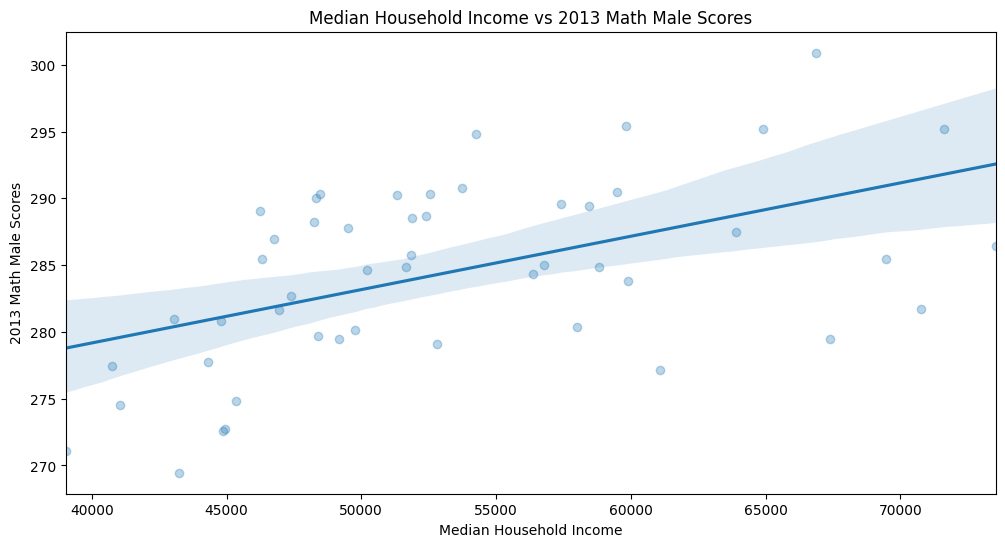

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='acspredict_median_household_income_in_the_past_12_months__in_2018_inflation-adjusted_dollars_estimatemedian household income in the past 12 months in 2018 inflationadjusted dollars', ylabel='math_female_2013'>

Text(0.5, 1.0, 'Median Household Income vs 2013 Female Math Scores')

Text(0.5, 0, 'Median Household Income')

Text(0, 0.5, '2013 Math Female Scores')

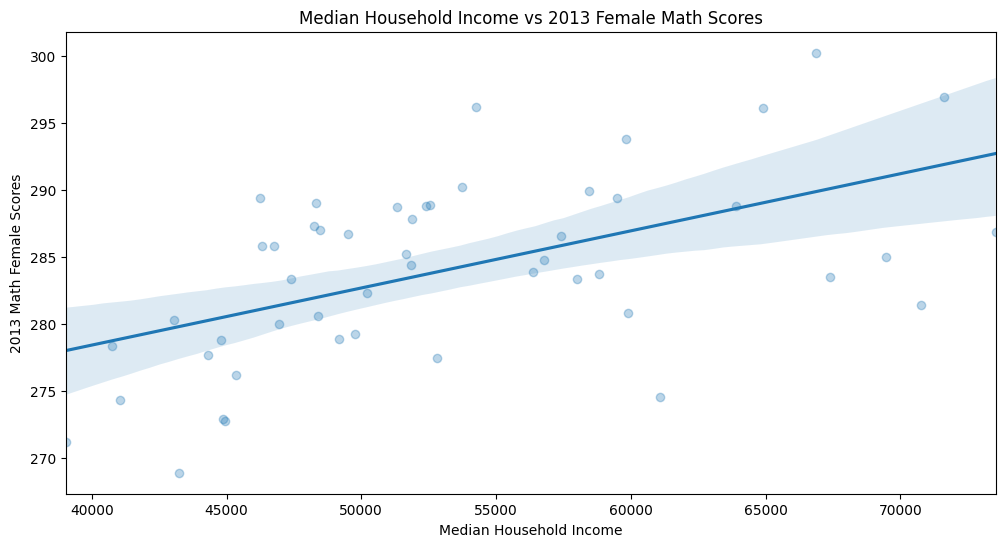

In [159]:
# B PLOTS
import seaborn as sns

## Scatterplot for math_male_2013 vs. median household income
plt.figure(figsize=(12, 6))
sns.regplot(x= q3['acspredict_median_household_income_in_the_past_12_months__in_2018_inflation-adjusted_dollars_estimatemedian household income in the past 12 months in 2018 inflationadjusted dollars'], 
            y=q3['math_male_2013'], scatter_kws={'alpha':0.3})
plt.title('Median Household Income vs 2013 Math Male Scores')
plt.xlabel('Median Household Income')
plt.ylabel('2013 Math Male Scores')
plt.show()

## Scatterplot for math_female_2013 vs. median household income
plt.figure(figsize=(12, 6))
sns.regplot(x=q3['acspredict_median_household_income_in_the_past_12_months__in_2018_inflation-adjusted_dollars_estimatemedian household income in the past 12 months in 2018 inflationadjusted dollars'], 
            y=q3['math_female_2013'], scatter_kws={'alpha':0.3})
plt.title('Median Household Income vs 2013 Female Math Scores')
plt.xlabel('Median Household Income')
plt.ylabel('2013 Math Female Scores')
plt.show()

In [163]:
# C
## Correlation of male performance with median household income
correlation_male_performance = np.corrcoef(q3['math_male_2013'], q3['acspredict_median_household_income_in_the_past_12_months__in_2018_inflation-adjusted_dollars_estimatemedian household income in the past 12 months in 2018 inflationadjusted dollars'])[0, 1]

## Correlation of female performance with median household income
correlation_female_performance = np.corrcoef(q3['math_female_2013'], q3['acspredict_median_household_income_in_the_past_12_months__in_2018_inflation-adjusted_dollars_estimatemedian household income in the past 12 months in 2018 inflationadjusted dollars'])[0, 1]

## Correlation of the indicator variable with median household income
correlation_indicator_variable = np.corrcoef(q3['male_higher_scores_2013'], q3['acspredict_median_household_income_in_the_past_12_months__in_2018_inflation-adjusted_dollars_estimatemedian household income in the past 12 months in 2018 inflationadjusted dollars'])[0, 1]

print(f"Correlation of Male Performance in 2013 and median household income: {correlation_male_performance}")
print(f"Correlation of Female Performance in 2013 and median household income: {correlation_female_performance}")
print(f"Correlation of Female Performance in 2013 and median household income: {correlation_indicator_variable}")

Correlation of Male Performance in 2013 and median household income: 0.5073471931940419
Correlation of Female Performance in 2013 and median household income: 0.5433780349589303
Correlation of Female Performance in 2013 and median household income: -0.03387519833365424


Our correlation tester shows that Males and females tend to test higher when the median household income is higher. That being said our indicator variable shows that females will test slightly better then males in states with higher median household incomes

## 3.3 Predicting disparities (10 points)

**A.** Read in the raw `acs_wmath` data again (this loses the variables you created above)

**B.** Construct a binary indicator variable for male score > female score  for each year - for full credit, do so without repeating the difference code for each of the four years: name these according to following convention: `outcome_male_higher_female_year` where year is 2013, 2015, 2017, or 2019 (e.g., 2013: `outcome_male_higher_female_2013`). After this, remove the raw math scores as columns in the data (so filter out any column with the word math)

**C.** Melt the data (`acs_wmath`) to long where instead of wide years, years are repeated within state; the ACS vars will also be repeated since we only pulled one year. In other words, reshape the data from "wide format", where each state is a row and we have separate columns for each year, to "long format", where states are repeated four times: once for each year in the data (2013, 2015, 2017, 2019). With 50 states, your final shape should be (200,84).
- See: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

**D.** Split into train-test split at state level (so all years in same state -> either all in train or all test). Randomize 35 states to train; 15 states in test. 

**E.** Normalize the features to mean 0, variance 1 and estimate a decision tree with a max depth of 5. Your covariates should have the term 'acspredict' in it.

- **Hint:** The ML literature recommends using the training set scaler to transform the test set, rather than using a unique scaler to initialize each one. The reasons are discussed here: https://stats.stackexchange.com/questions/495357/why-do-we-normalize-test-data-on-the-parameters-of-the-training-data

**F.** Interpret the feature importances

**G.** Evaluate the precision and recall of that model in the test set states without using the `score`, `precision`, or `recall` functions in sklearn. Briefly interpret: compared to our class example (a high-dimensional feature matrix of yelp reviews with ~15000 observations), why do you think our models perform worse for this set of data/predictors?

**Additional resources:** 

- Feature normalization: https://scikit-learn.org/stable/modules/preprocessing.html

- Definition of precision and recall: https://en.wikipedia.org/wiki/Precision_and_recall

In [164]:
# A. your code here to load data
q33 = pd.read_csv('acs_wmath.csv')
q33.head()

,math_female_2013,math_female_2015,math_female_2017,math_female_2019,math_male_2013,math_male_2015,math_male_2017,math_male_2019,abbrev,FIPS,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 10 to less than 25 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 100 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 25 to less than 50 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 50 to less than 100 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated dollar value of zero allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated more than 0 to less than 10 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated no income allocated,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal10th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal11th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal12th grade no diploma,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal1st grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal2nd grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal3rd grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal4th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal5th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal6th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal7th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal8th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal9th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalassociate's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalbachelor's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotaldoctorate degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalged or alternative credential,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalkindergarten,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalmaster's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalno schooling completed,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalnursery school,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalprofessional school degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalregular high school diploma,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college 1 or more years no degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college less than 1 year,acspredict_household_type__including_living_alone__by_relationshipestimatetotalin group quarters,acspredict_household_type__including_living_alone__by_relationshipestimatetot

In [165]:
# B. your code here to construct binary indicators for male higher
years = [2013, 2015, 2017, 2019]

for year in years:
    column_name = f'outcome_male_higher_female_{year}'
    male_column = f'math_male_{year}'
    female_column = f'math_female_{year}'
    
    q33[column_name] = q33[male_column] > q33[female_column]

## Remove raw math scores columns
math_columns = [f'math_male_{year}' for year in years] + [f'math_female_{year}' for year in years]
q33_new = q33.drop(columns=math_columns)

In [166]:
# C. your code here to melt data
## Set columns to melt
cols_to_melt = ['outcome_male_higher_female_2013', 'outcome_male_higher_female_2015', 
                'outcome_male_higher_female_2017', 'outcome_male_higher_female_2019']

## Set columns to keep
cols_to_keep = [col for col in q33_new.columns if col not in cols_to_melt]

## Melt to long format
q33_long = pd.melt(q33_new, id_vars=cols_to_keep, value_vars=cols_to_melt, 
                  var_name='year', value_name='outcome_male_higher_female')

## Display
q33_long.shape
q33_long.head()

(200, 86)

,abbrev,FIPS,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 10 to less than 25 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 100 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 25 to less than 50 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 50 to less than 100 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated dollar value of zero allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated more than 0 to less than 10 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated no income allocated,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal10th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal11th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal12th grade no diploma,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal1st grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal2nd grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal3rd grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal4th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal5th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal6th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal7th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal8th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal9th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalassociate's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalbachelor's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotaldoctorate degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalged or alternative credential,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalkindergarten,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalmaster's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalno schooling completed,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalnursery school,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalprofessional school degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalregular high school diploma,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college 1 or more years no degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college less than 1 year,acspredict_household_type__including_living_alone__by_relationshipestimatetotalin group quarters,acspredict_household_type__including_living_alone__by_relationshipestimatetotalin households,acspredict_household_type__including_living_alone__by_relationshipestimatetotalin householdsin family households

In [171]:
# D. your code here for train/test split

## Define states 
states = q33_long['state'].unique()

## Randomly select 35 states for training and 15 states for testing
train_states, test_states = train_test_split(states, test_size=15, random_state=42)

## Create train and test df
q33_train = q33_long[q33_long['state'].isin(train_states)]
q33_test = q33_long[q33_long['state'].isin(test_states)]

In [173]:
# E. your code here to normalize features and fit model

## Select covariates with 'acspredict' in the column name
acspredict_cols = [col for col in q33_train.columns if 'acspredict' in col]

## Define the features and target variable
X_train = q33_train[acspredict_cols]
y_train = q33_train['outcome_male_higher_female']

X_test = q33_test[acspredict_cols]
y_test = q33_test['outcome_male_higher_female']

## Create a column transformer to scale only specified columns
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[('scaler', scaler, acspredict_cols)])

## Create a pipeline with normalization and decision tree
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=5, random_state=42))
])

## Fit the model on the training data
model.fit(X_train, y_train)

## Predict on test data
y_pred = model.predict(X_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent '
                                                   'of income allocated 10 to '
                                                   'less than 25 percent of '
                                                   'total income for household '
                                                   'allocated',
                                                   'acspredict_allocation_of_household_income_in_the_past_12_months_-_...
                                                   'acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalprofessional '
                                                   'school degree',
                                                   'acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalregular '
                                                   'high school diploma',
                                                   'acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome '
                                                   'college 1 or more years no '
                                                   'degree', ...])])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [175]:
# F. your code here to interpret feature importances
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

#X_train and y_train 
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display DataFrame
print('The most important features: ')
print(feature_importance_df[feature_importance_df['Importance'] > 0])

DecisionTreeRegressor()

The most important features: 
                                                                                                                                                 Feature  Importance
39                            acspredict_household_type__including_living_alone__by_relationshipestimatetotalin householdsin family householdsgrandchild    0.346779
57      acspredict_household_type__including_living_alone__by_relationshipestimatetotalin householdsin nonfamily householdshouseholderfemaleliving alone    0.171249
51                           acspredict_household_type__including_living_alone__by_relationshipestimatetotalin householdsin family householdsparentinlaw    0.154525
26                                                     acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalnursery school    0.091979
15                                                          acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal6t

In [179]:
# G. your code here to evaluate model
## Predict on the test set
y_pred = model.predict(X_test)

## Convert predictions to binary using a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# True positives (TP), false positives (FP), false negatives (FN)
TP = ((y_pred_binary == 1) & (y_test == 1)).sum()
FP = ((y_pred_binary == 1) & (y_test == 0)).sum()
FN = ((y_pred_binary == 0) & (y_test == 1)).sum()

## Precision and Recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

precision = round(precision, 3)
recall = round(recall, 3)

## Display results
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.625
Recall: 0.161


A precision of 0.625 means that of all the instances predicted as positive by the model, approximately 62.5% were actually positive. In other words, when the model predicts a positive outcome, it is correct about 62.5% of the time. This suggests a relatively moderate level of accuracy in identifying positive instances.


A recall of 0.161 indicates that of all the actual positive instances, the model correctly predicted only about 16.1%. In practical terms, this means the model may be missing a significant number of positive instances. The low recall suggests that the model is not capturing a substantial portion of the positive cases, which could lead to underestimating the true prevalence of the positive class.

the reason it is not as strong of a model likely has to do with the very small amount of observations comapred to the 15000 we showed in class